In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import os
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


In [103]:
credito = pd.read_csv('Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [104]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [105]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])
    
labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])
  
labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])
    
labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])
    
labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])
    
labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])
    
labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])
    
labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])
        
labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])
  
labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])
    
labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])
    
labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [106]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [14]:
x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [19]:
x_teste.shape, x_treinamento.shape

((300, 20), (700, 20))

In [20]:
naive = GaussianNB()
naive.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
previsoes = naive.predict(x_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [25]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [26]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

In [27]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

AttributeError: ignored

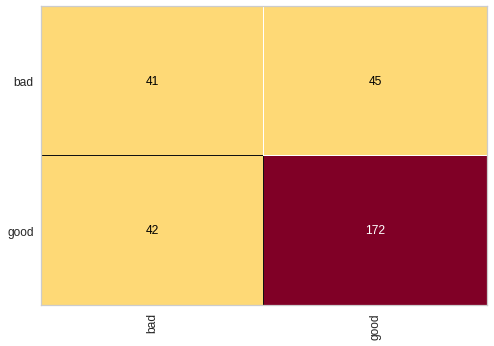

In [44]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.pof()

In [39]:
credito2 = pd.read_csv('NovoCredit.csv')
credito2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [40]:
credito2 = credito2.iloc[:,0:20].values
credito2[:,0] = labelencoder1.transform(credito2[:,0])
credito2[:,2] = labelencoder2.transform(credito2[:,2])
credito2[:,3] = labelencoder3.transform(credito2[:,3])
credito2[:,5] = labelencoder4.transform(credito2[:,5])
credito2[:,6] = labelencoder5.transform(credito2[:,6])
credito2[:,8] = labelencoder6.transform(credito2[:,8])
credito2[:,9] = labelencoder7.transform(credito2[:,9])
credito2[:,11] = labelencoder8.transform(credito2[:,11])
credito2[:,13] = labelencoder9.transform(credito2[:,13])
credito2[:,14] = labelencoder10.transform(credito2[:,14])
credito2[:,16] = labelencoder11.transform(credito2[:,16])
credito2[:,18] = labelencoder12.transform(credito2[:,18])
credito2[:,19] = labelencoder13.transform(credito2[:,19]) 

In [46]:
naive.predict(credito2)

array(['good'], dtype='<U4')

In [47]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [97]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state=0)

In [54]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento,y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
export_graphviz(arvore, out_file = 'tree.dot')

In [56]:
previsoes = arvore.predict(x_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',

In [58]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 44,  42],
       [ 51, 163]])

In [60]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.69

AttributeError: ignored

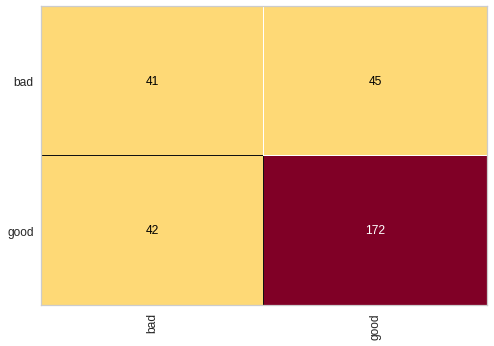

In [61]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.pof()


In [99]:
svm = SVC()
svm.fit(x_treinamento, y_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
previsao = svm.predict(x_teste)
previsao

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [67]:
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_acerto

0.7166666666666667

In [70]:
forest = ExtraTreesClassifier()
forest.fit(x_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.10906301, 0.08670229, 0.06136095, 0.05930587, 0.08545891,
       0.04650197, 0.05529812, 0.05154737, 0.04362216, 0.02630045,
       0.05091905, 0.04965849, 0.06257584, 0.0340197 , 0.03667783,
       0.03475981, 0.04021229, 0.0251363 , 0.0321816 , 0.008698  ])

In [76]:
x_treino2 = x_treinamento[:, [0,1,2,3,4]]
x_teste2 = x_teste[:,[0,1,2,3,4]]

In [77]:
svm2 = SVC()
svm2.fit(x_treino2, y_treinamento)
previsoes2 = svm2.predict(x_teste2)
taxa_acerto2 = accuracy_score(y_teste, previsoes2)
taxa_acerto2

0.7166666666666667

In [79]:
iristemp = pd.read_csv('iris.csv')
iristemp

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
iristemp.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris = datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [82]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [83]:
previsores = iris.data
classe = iris.target

In [85]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    previsores,
    classe,
    test_size = 0.3,
    random_state = 0
)

In [86]:
x_treino, x_teste, y_treino, y_teste

(array([[5. , 2. , 3.5, 1. ],
        [6.5, 3. , 5.5, 1.8],
        [6.7, 3.3, 5.7, 2.5],
        [6. , 2.2, 5. , 1.5],
        [6.7, 2.5, 5.8, 1.8],
        [5.6, 2.5, 3.9, 1.1],
        [7.7, 3. , 6.1, 2.3],
        [6.3, 3.3, 4.7, 1.6],
        [5.5, 2.4, 3.8, 1.1],
        [6.3, 2.7, 4.9, 1.8],
        [6.3, 2.8, 5.1, 1.5],
        [4.9, 2.5, 4.5, 1.7],
        [6.3, 2.5, 5. , 1.9],
        [7. , 3.2, 4.7, 1.4],
        [6.5, 3. , 5.2, 2. ],
        [6. , 3.4, 4.5, 1.6],
        [4.8, 3.1, 1.6, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [5.6, 2.7, 4.2, 1.3],
        [5.6, 2.9, 3.6, 1.3],
        [5.5, 2.5, 4. , 1.3],
        [6.1, 3. , 4.6, 1.4],
        [7.2, 3.2, 6. , 1.8],
        [5.3, 3.7, 1.5, 0.2],
        [4.3, 3. , 1.1, 0.1],
        [6.4, 2.7, 5.3, 1.9],
        [5.7, 3. , 4.2, 1.2],
        [5.4, 3.4, 1.7, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.9, 3.1, 4.9, 1.5],
        [4.6, 3.1, 1.5, 0.2],
        [5.9, 3. , 5.1, 1.8],
        [5.1, 2.5, 3. , 1.1],
        [4

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treino, y_treino)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [88]:
previsoes = knn.predict(x_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [89]:
confusao = confusion_matrix(previsoes, y_teste)
confusao

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]])

In [91]:
taxa_acerto = accuracy_score(previsoes, y_teste)
taxa_acerto

0.9777777777777777

In [107]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [108]:
previsoes = knn.predict(x_teste)
previsoes

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 

In [109]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[  9,  77],
       [ 14, 200]])

In [110]:
taxaAcerto = accuracy_score(y_teste, previsoes)
taxaAcerto

0.6966666666666667

In [112]:
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(x_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
floresta.estimators_[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=737762795, splitter='best')

In [114]:
previsoes = floresta.predict(x_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good',

In [115]:
taxa = accuracy_score(y_teste, previsoes)
taxa

0.7666666666666667

In [117]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 36,  50],
       [ 20, 194]])

In [120]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [126]:
unicos, quantidade = np.unique(iris.target, return_counts = True)
unicos

array([0, 1, 2])

In [127]:
quantidade

array([50, 50, 50])

In [129]:
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
centroides = cluster.cluster_centers_
centroides

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [131]:
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [132]:
unico2, quantidade2 = np.unique(previsoes, return_counts=True)
unico2

array([0, 1, 2], dtype=int32)

In [133]:
quantidade2

array([38, 50, 62])

In [134]:
resultado = confusion_matrix(iris.target, previsoes)
resultado

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

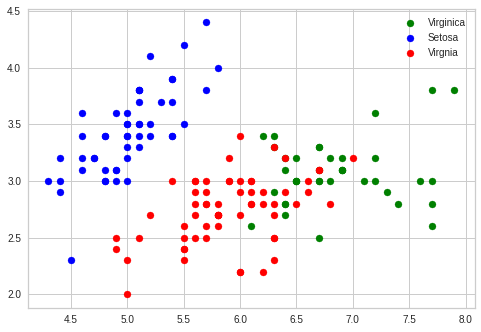

In [146]:
plt.scatter(iris.data[previsoes==0,0], iris.data[previsoes==0,1],c='green', label = 'Virginica')
plt.scatter(iris.data[previsoes==1,0], iris.data[previsoes==1,1], c='blue', label = 'Setosa')
plt.scatter(iris.data[previsoes==2,0], iris.data[previsoes==2,1], c='red', label = 'Virgnia')
plt.legend()

In [144]:
iris.data[previsoes==2,0]

array([7. , 6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1,
       5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 5.8, 4.9, 5.7, 5.8,
       6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6. , 5.8, 6.3, 5.9])